## Gaussian Mixture Model Example
### Generate three Gaussian distributions in a 2D-space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gaussian_mixture import GaussianMixture

cluster_1 = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], 200)
cluster_2 = np.random.multivariate_normal([-1, 3], [[1, 0.5], [0.5, 3]], 200)
cluster_3 = np.random.multivariate_normal([4, -3], [[1, -0.5], [-0.5, 4]], 200)

X = np.vstack((cluster_1, cluster_2, cluster_3))

### Instantiate and fit a Gaussian Mixture Model to these three clusters.

In [2]:
# Gaussian Mixture Model with 3 clusters
gm = GaussianMixture(number_of_clusters=3)

# Train the model
mu, sigma, phi = gm.fit(X, threshold=1E-5)

### Retrieve the responsibilities of the model and use them to plot a scatter graph of where each of the data points belong and compare this to the true labels.

<IPython.core.display.Javascript object>


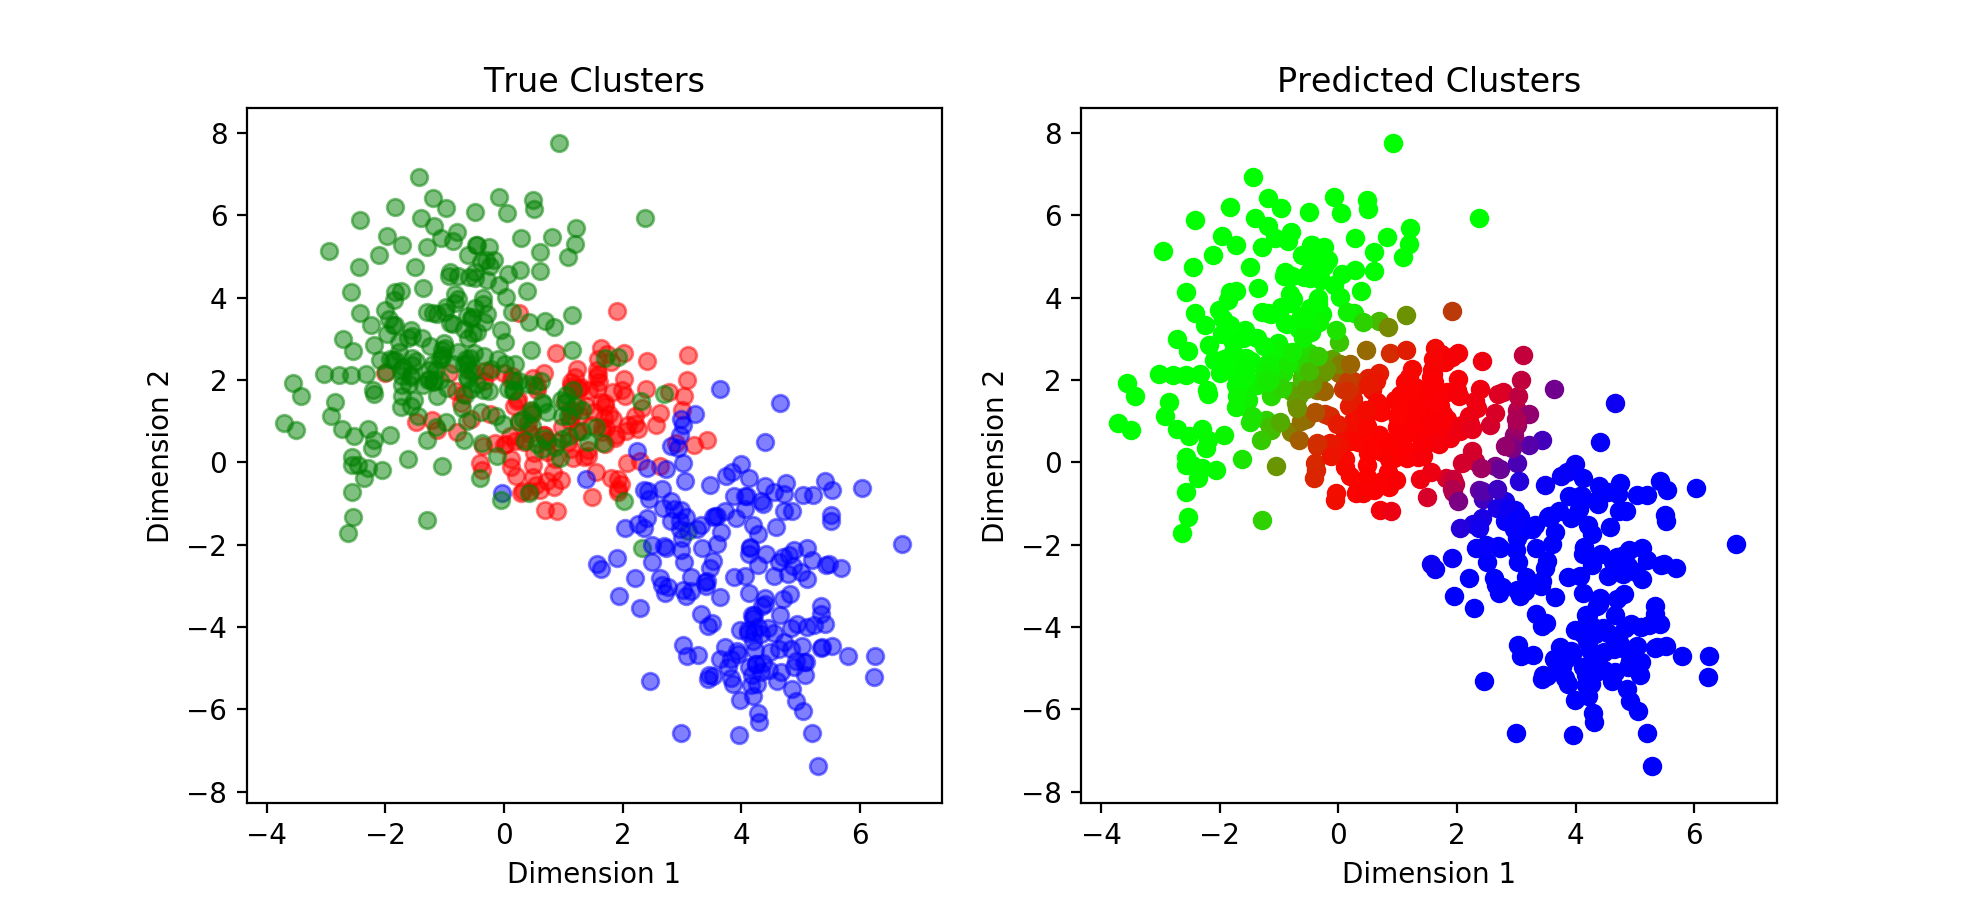

In [4]:
%matplotlib notebook
responsibilities = gm.expectation_step(X)

fig, ax = plt.subplots(1, 2)

for j, i in enumerate(X):
    if j < 150:
        color = 'r'
    
    elif j > 150 and j < 400:
        color = 'g'
    
    else:
        color = 'b'

    ax[0].scatter(i[0], i[1], color=color, alpha=0.5)

for j, i in enumerate(X):
    color = (responsibilities[0][j], responsibilities[1][j], responsibilities[2][j])
    ax[1].scatter(i[0], i[1], color=color)

    
ax[0].set_xlabel('Dimension 1')
ax[1].set_xlabel('Dimension 1')
ax[0].set_ylabel('Dimension 2')
ax[1].set_ylabel('Dimension 2')
ax[0].set_title('True Clusters')
ax[1].set_title('Predicted Clusters')
plt.show()